# BANK MARKETING

In [1]:
import pandas as pd

# Load the datasets
train_url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv"
test_url = "https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Bank%20Marketing/termdeposit_test.csv?raw=true"

train_data = pd.read_csv(train_url)
test_data = pd.read_csv(test_url)

# Display the first few rows of the training data
train_data.head()


,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [2]:
# Display the columns in the train and test datasets
print(train_data.columns)
print(test_data.columns)

# Drop columns that do not exist in the dataset
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Convert target variable to binary
train_data['subscribed'] = train_data['subscribed'].map({'yes': 1, 'no': 0})

# Convert categorical variables to dummy variables
train_data = pd.get_dummies(train_data, columns=categorical_cols, drop_first=True)
test_data = pd.get_dummies(test_data, columns=categorical_cols, drop_first=True)

# Align columns in test data to match train data
missing_cols = set(train_data.columns) - set(test_data.columns)
for col in missing_cols:
    test_data[col] = 0
test_data = test_data[train_data.columns.drop('subscribed')]

# Display the first few rows of the processed training data
train_data.head()


Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')
Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')


,ID,age,balance,day,duration,campaign,pdays,previous,subscribed,job_blue-collar,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,26110,56,1933,19,44,2,-1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,40576,31,3,20,91,2,-1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,15320,27,891,18,240,1,-1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,43962,57,3287,22,867,1,84,3,1,0,...,0,1,0,0,0,0,0,0,1,0
4,29842,31,119,4,380,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [3]:
# Check for missing values and data types
print(train_data.info())

# Display unique values in the 'subscribed' column
print(train_data['subscribed'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 44 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   31647 non-null  int64
 1   age                  31647 non-null  int64
 2   balance              31647 non-null  int64
 3   day                  31647 non-null  int64
 4   duration             31647 non-null  int64
 5   campaign             31647 non-null  int64
 6   pdays                31647 non-null  int64
 7   previous             31647 non-null  int64
 8   subscribed           31647 non-null  int64
 9   job_blue-collar      31647 non-null  uint8
 10  job_entrepreneur     31647 non-null  uint8
 11  job_housemaid        31647 non-null  uint8
 12  job_management       31647 non-null  uint8
 13  job_retired          31647 non-null  uint8
 14  job_self-employed    31647 non-null  uint8
 15  job_services         31647 non-null  uint8
 16  job_student          3

In [4]:
# Convert target variable to binary if it's not already done
if train_data['subscribed'].dtype == object:
    train_data['subscribed'] = train_data['subscribed'].map({'yes': 1, 'no': 0})

# Verify the conversion
print(train_data['subscribed'].unique())


[0 1]


In [5]:
# Check for missing values in the target column
print(train_data['subscribed'].isnull().sum())


0


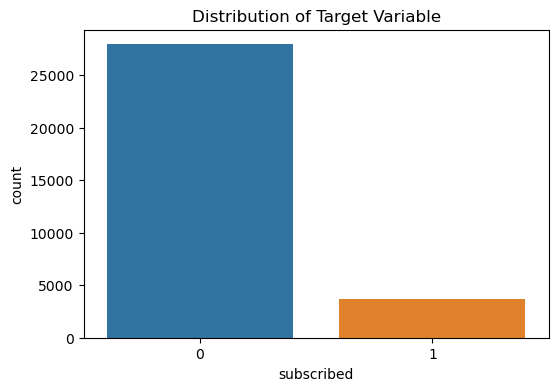

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable
plt.figure(figsize=(6,4))
sns.countplot(x='subscribed', data=train_data)
plt.title('Distribution of Target Variable')
plt.show()


      ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4    

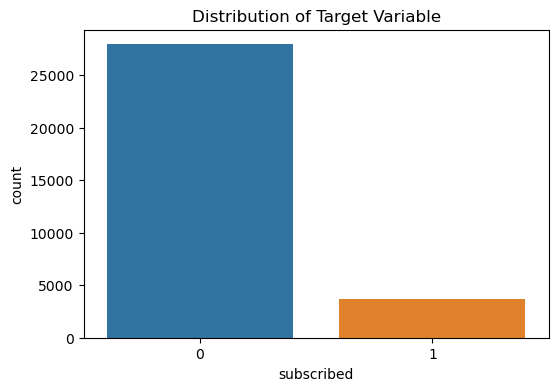

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_url = "https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv"
test_url = "https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Bank%20Marketing/termdeposit_test.csv?raw=true"

train_data = pd.read_csv(train_url)
test_data = pd.read_csv(test_url)

# Display the first few rows of the train dataset
print(train_data.head())

# Check the unique values in the 'subscribed' column
print(train_data['subscribed'].unique())

# Check for missing values in the 'subscribed' column
missing_values = train_data['subscribed'].isnull().sum()
print(f"Missing values in 'subscribed': {missing_values}")

# If there are missing values, investigate and handle them
if missing_values > 0:
    # Check the proportion of missing values
    missing_percentage = (missing_values / len(train_data)) * 100
    print(f"Percentage of missing values: {missing_percentage:.2f}%")

    # If it's feasible to drop rows with missing target values
    train_data = train_data.dropna(subset=['subscribed'])

    # Verify the changes
    print(train_data['subscribed'].unique())

# Convert target variable to binary if it's not already done
if train_data['subscribed'].dtype == object:
    train_data['subscribed'] = train_data['subscribed'].map({'yes': 1, 'no': 0})

# Verify the conversion
print(train_data['subscribed'].unique())

# Plot the distribution of the target variable
plt.figure(figsize=(6,4))
sns.countplot(x='subscribed', data=train_data)
plt.title('Distribution of Target Variable')
plt.show()


In [8]:
# Summary statistics of numerical features
print(train_data.describe())


                 ID           age        balance           day      duration  \
count  31647.000000  31647.000000   31647.000000  31647.000000  31647.000000   
mean   22563.972162     40.957247    1363.890258     15.835466    258.113534   
std    13075.936990     10.625134    3028.304293      8.337097    257.118973   
min        2.000000     18.000000   -8019.000000      1.000000      0.000000   
25%    11218.000000     33.000000      73.000000      8.000000    104.000000   
50%    22519.000000     39.000000     450.000000     16.000000    180.000000   
75%    33879.500000     48.000000    1431.000000     21.000000    318.500000   
max    45211.000000     95.000000  102127.000000     31.000000   4918.000000   

           campaign         pdays      previous    subscribed  
count  31647.000000  31647.000000  31647.000000  31647.000000  
mean       2.765697     39.576042      0.574272      0.117389  
std        3.113830     99.317592      2.422529      0.321888  
min        1.000000    

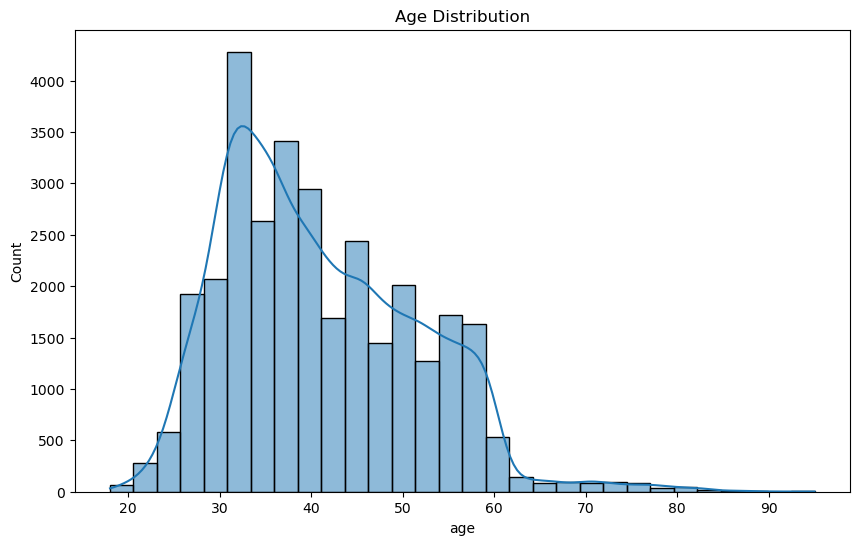

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(train_data['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()


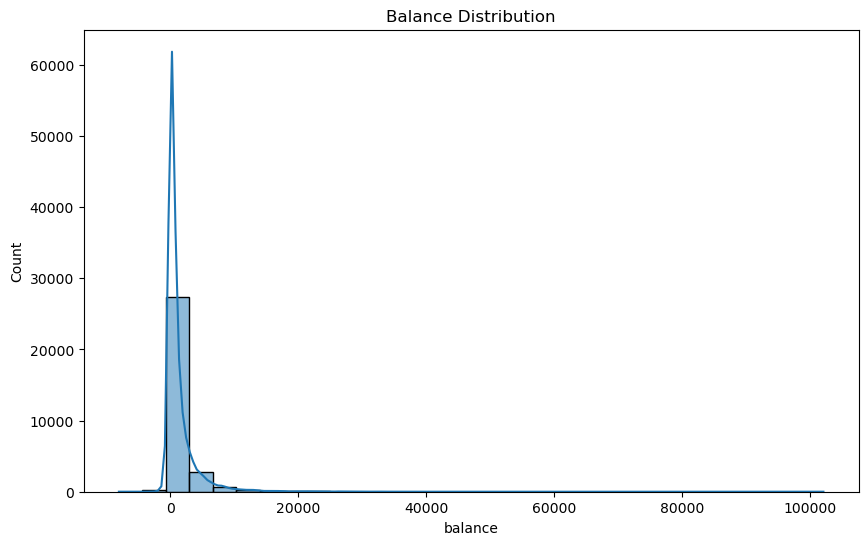

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(train_data['balance'], kde=True, bins=30)
plt.title('Balance Distribution')
plt.show()


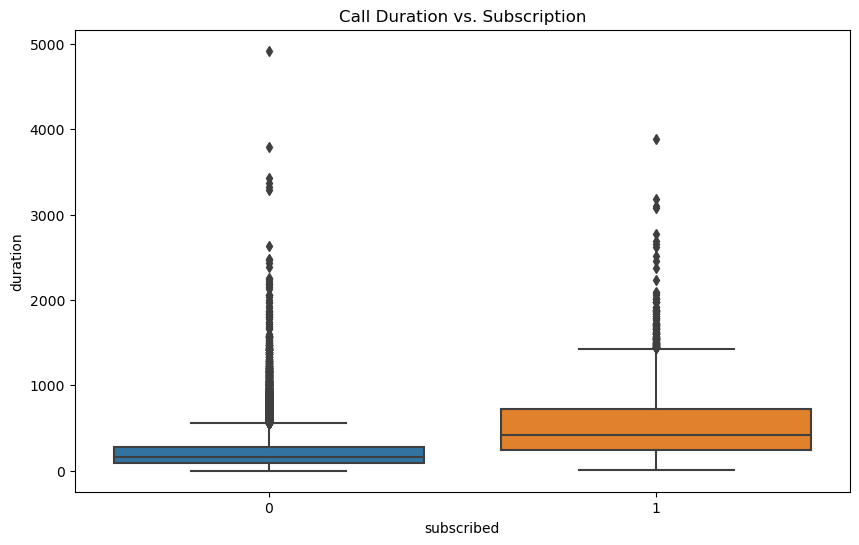

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x='subscribed', y='duration', data=train_data)
plt.title('Call Duration vs. Subscription')
plt.show()


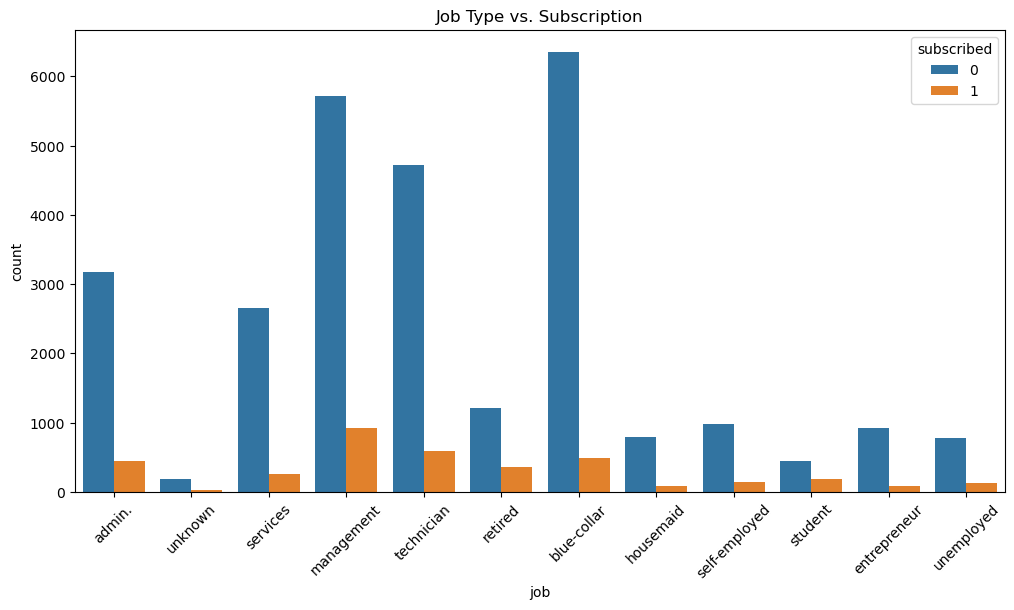

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(x='job', hue='subscribed', data=train_data)
plt.title('Job Type vs. Subscription')
plt.xticks(rotation=45)
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13556\2694410641.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr()


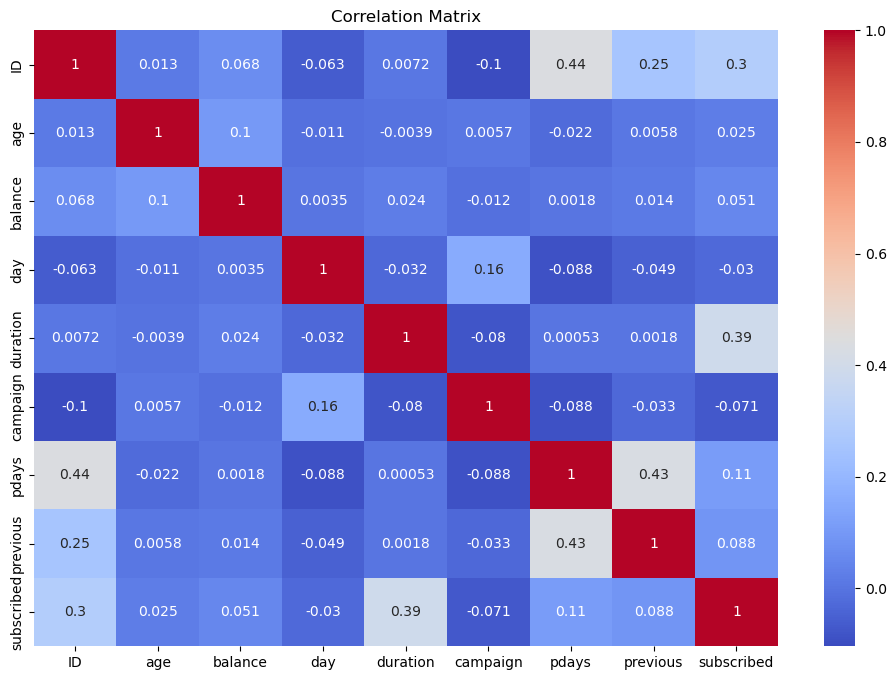

In [13]:
plt.figure(figsize=(12,8))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [14]:
from sklearn.preprocessing import StandardScaler

# Features to normalize
features_to_scale = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

scaler = StandardScaler()
train_data[features_to_scale] = scaler.fit_transform(train_data[features_to_scale])


In [15]:
# Check class balance
print(train_data['subscribed'].value_counts())

# If the data is imbalanced, you can use techniques like SMOTE
from imblearn.over_sampling import SMOTE

X = train_data.drop(columns=['ID', 'subscribed'])
y = train_data['subscribed']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert back to DataFrame for consistency
train_data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
train_data_resampled['subscribed'] = y_resampled


0    27932
1     3715
Name: subscribed, dtype: int64


ValueError: could not convert string to float: 'admin.'

In [ ]:
pip install --upgrade scikit-learn


In [ ]:
pip install --upgrade imbalanced-learn


In [ ]:
pip uninstall scikit-learn imbalanced-learn


In [ ]:
pip install scikit-learn imbalanced-learn


In [ ]:
pip install imbalanced-learn scikit-learn pandas


In [16]:
# Check class balance before resampling
print("Class balance before resampling:")
print(train_data['subscribed'].value_counts())

# If the data is imbalanced, you can use techniques like SMOTE
try:
    from imblearn.over_sampling import SMOTE
except ImportError as e:
    print("Failed to import SMOTE. Ensure you have imbalanced-learn installed.")
    raise e

# Separate features and target
X = train_data.drop(columns=['ID', 'subscribed'])
y = train_data['subscribed']

# Apply SMOTE to balance the dataset
try:
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
except Exception as e:
    print("An error occurred during SMOTE resampling.")
    raise e

# Convert back to DataFrame for consistency
train_data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
train_data_resampled['subscribed'] = y_resampled

# Check class balance after resampling
print("\nClass balance after resampling:")
print(train_data_resampled['subscribed'].value_counts())

# Display first few rows of the resampled data
print("\nFirst few rows of the resampled training data:")
print(train_data_resampled.head())


Class balance before resampling:
0    27932
1     3715
Name: subscribed, dtype: int64
An error occurred during SMOTE resampling.


ValueError: could not convert string to float: 'admin.'

In [17]:
from sklearn.preprocessing import StandardScaler

# Select numerical features for scaling
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numerical features
train_data[numerical_cols] = scaler.fit_transform(train_data[numerical_cols])
test_data[numerical_cols] = scaler.transform(test_data[numerical_cols])

# Check the first few rows of the scaled dataset
print("Scaled Training Data:")
print(train_data.head())


Scaled Training Data:
      ID       age         job   marital  education default   balance housing  \
0  26110  1.415793      admin.   married    unknown      no  0.187933      no   
1  40576 -0.937156     unknown   married  secondary      no -0.449397      no   
2  15320 -1.313627    services   married  secondary      no -0.156159     yes   
3  43962  1.509911  management  divorced   tertiary      no  0.635055      no   
4  29842 -0.937156  technician   married  secondary      no -0.411091     yes   

  loan    contact       day month  duration  campaign     pdays  previous  \
0   no  telephone  0.379579   nov -0.832754 -0.245906 -0.408555 -0.237059   
1   no   cellular  0.499526   jul -0.649957 -0.245906 -0.408555 -0.237059   
2   no   cellular  0.259631   jul -0.070449 -0.567059 -0.408555 -0.237059   
3   no   cellular  0.739422   jun  2.368149 -0.567059  0.447299  1.001336   
4   no   cellular -1.419637   feb  0.474054 -0.567059 -0.408555 -0.237059   

  poutcome  subscribed  
0  

In [18]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = train_data.drop(columns=['ID', 'subscribed'])
y = train_data['subscribed']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (25317, 16)
Testing data shape: (6330, 16)


In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the column transformer for one-hot encoding
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'
)

# Create a pipeline with preprocessing and Logistic Regression model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9014218009478673


In [20]:
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      5599
           1       0.63      0.36      0.46       731

    accuracy                           0.90      6330
   macro avg       0.77      0.66      0.70      6330
weighted avg       0.89      0.90      0.89      6330

Confusion Matrix:
[[5445  154]
 [ 470  261]]


# Restaurant Food Cost

In [21]:
import pandas as pd

# Load the training data
train_data = pd.read_excel("https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Restaurant%20Food%20Cost/Data_Train.xlsx")

# Load the testing data
test_data = pd.read_excel("https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Restaurant%20Food%20Cost/Data_Test.xlsx")

# Display the first few rows of the training data
print("Training Data:")
print(train_data.head())

# Display the first few rows of the testing data
print("\nTesting Data:")
print(test_data.head())

# Check the shape of the training and testing data
print("\nTraining Data Shape:", train_data.shape)
print("Testing Data Shape:", test_data.shape)


Training Data:
               TITLE  RESTAURANT_ID  \
0      CASUAL DINING           9438   
1  CASUAL DINING,BAR          13198   
2      CASUAL DINING          10915   
3        QUICK BITES           6346   
4     DESSERT PARLOR          15387   

                                     CUISINES  \
0                 Malwani, Goan, North Indian   
1              Asian, Modern Indian, Japanese   
2  North Indian, Chinese, Biryani, Hyderabadi   
3                            Tibetan, Chinese   
4                                    Desserts   

                                     TIME     CITY        LOCALITY RATING  \
0  11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)    Thane  Dombivali East    3.6   
1                    6pm – 11pm (Mon-Sun)  Chennai       Ramapuram    4.2   
2     11am – 3:30pm, 7pm – 11pm (Mon-Sun)  Chennai      Saligramam    3.8   
3                 11:30am – 1am (Mon-Sun)   Mumbai     Bandra West    4.1   
4                    11am – 1am (Mon-Sun)   Mumbai     Lower Parel    

In [22]:
# Check for missing values in the training data
print("Missing Values in Training Data:")
print(train_data.isnull().sum())

# Check for missing values in the testing data
print("\nMissing Values in Testing Data:")
print(test_data.isnull().sum())

# Drop any rows with missing values
train_data.dropna(inplace=True)

# Check the shape of the data after dropping missing values
print("\nTraining Data Shape after Dropping Missing Values:", train_data.shape)


Missing Values in Training Data:
TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

Missing Values in Testing Data:
TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

Training Data Shape after Dropping Missing Values: (11393, 9)


In [23]:
# Extract numerical features from the 'VOTES' column
train_data['VOTES'] = train_data['VOTES'].str.extract('(\d+)').astype(float)
test_data['VOTES'] = test_data['VOTES'].str.extract('(\d+)').astype(float)

# Extract the number of cuisines offered by each restaurant
train_data['NUM_CUISINES'] = train_data['CUISINES'].apply(lambda x: len(x.split(',')))
test_data['NUM_CUISINES'] = test_data['CUISINES'].apply(lambda x: len(x.split(',')))

# Drop irrelevant columns
columns_to_drop = ['RESTAURANT_ID', 'TIME']
train_data.drop(columns=columns_to_drop, inplace=True)
test_data.drop(columns=columns_to_drop, inplace=True)

# One-hot encode categorical variables
train_data = pd.get_dummies(train_data, columns=['TITLE', 'CITY', 'LOCALITY'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['TITLE', 'CITY', 'LOCALITY'], drop_first=True)

# Separate features and target variable
X_train = train_data.drop(columns=['COST'])
y_train = train_data['COST']
X_test = test_data.copy()

# Check the shape of the data after feature engineering
print("\nTraining Data Shape after Feature Engineering:", X_train.shape)
print("Testing Data Shape after Feature Engineering:", X_test.shape)



Training Data Shape after Feature Engineering: (11393, 1759)
Testing Data Shape after Feature Engineering: (4231, 1072)


In [24]:
# One-hot encode categorical variables
X_train_encoded = pd.get_dummies(X_train, columns=['CUISINES', 'CITY', 'LOCALITY', 'TITLE', 'TIME'])
X_test_encoded = pd.get_dummies(X_test, columns=['CUISINES', 'CITY', 'LOCALITY', 'TITLE', 'TIME'])

# Ensure that both datasets have the same columns after one-hot encoding
missing_cols = set(X_train_encoded.columns) - set(X_test_encoded.columns)
for col in missing_cols:
    X_test_encoded[col] = 0
X_test_encoded = X_test_encoded[X_train_encoded.columns]

# Now, proceed with model training and evaluation using the encoded datasets


KeyError: "['CITY', 'LOCALITY', 'TITLE', 'TIME'] not in index"

In [25]:
# Display the first few rows of the training data
print("First few rows of the training data:")
print(train_data.head())

# Display the column names of the training data
print("\nColumn names of the training data:")
print(train_data.columns)


First few rows of the training data:
                                     CUISINES RATING  VOTES  COST  \
0                 Malwani, Goan, North Indian    3.6   49.0  1200   
1              Asian, Modern Indian, Japanese    4.2   30.0  1500   
2  North Indian, Chinese, Biryani, Hyderabadi    3.8  221.0   800   
3                            Tibetan, Chinese    4.1   24.0   800   
4                                    Desserts    3.8  165.0   300   

   NUM_CUISINES  TITLE_BAKERY,BEVERAGE SHOP  TITLE_BAKERY,CAFÉ  \
0             3                           0                  0   
1             3                           0                  0   
2             4                           0                  0   
3             2                           0                  0   
4             1                           0                  0   

   TITLE_BAKERY,CONFECTIONERY  TITLE_BAKERY,DESSERT PARLOR  \
0                           0                            0   
1                          

In [26]:
# Summary statistics for numerical features
print("Summary Statistics for Numerical Features:")
print(train_data.describe())


Summary Statistics for Numerical Features:
              VOTES          COST  NUM_CUISINES  TITLE_BAKERY,BEVERAGE SHOP  \
count  11393.000000  11393.000000  11393.000000                11393.000000   
mean     416.997630    682.670148      2.602739                    0.000088   
std      845.511189    646.942238      1.367382                    0.009369   
min        4.000000     50.000000      1.000000                    0.000000   
25%       57.000000    300.000000      2.000000                    0.000000   
50%      164.000000    500.000000      2.000000                    0.000000   
75%      458.000000    800.000000      3.000000                    0.000000   
max    41186.000000  14000.000000      8.000000                    1.000000   

       TITLE_BAKERY,CAFÉ  TITLE_BAKERY,CONFECTIONERY  \
count       11393.000000                11393.000000   
mean            0.001053                    0.000088   
std             0.032439                    0.009369   
min             0.000

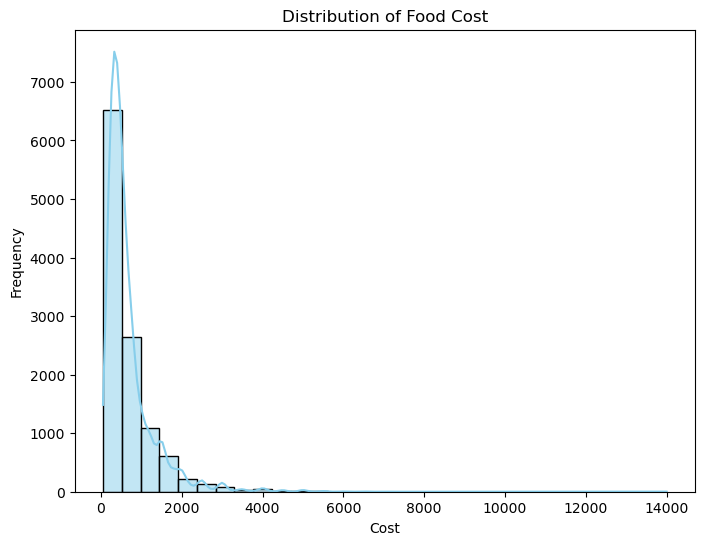

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plot for 'COST'
plt.figure(figsize=(8, 6))
sns.histplot(train_data['COST'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Food Cost')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()


In [28]:
import matplotlib.pyplot as plt


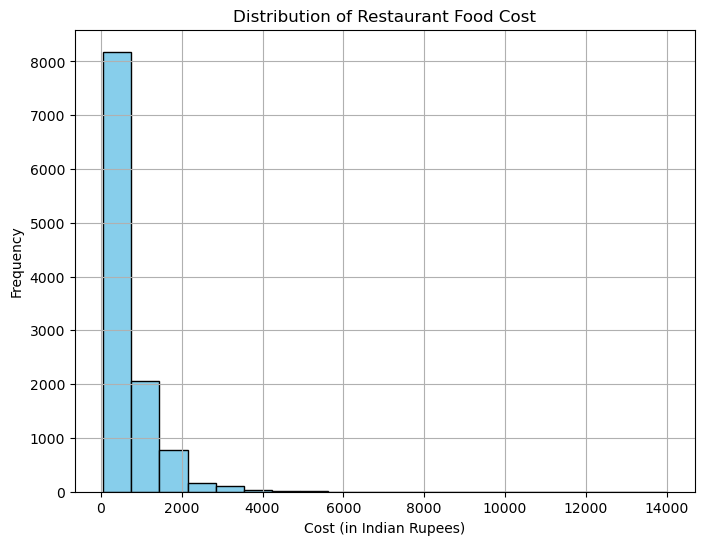

In [29]:
plt.figure(figsize=(8, 6))
plt.hist(train_data['COST'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Restaurant Food Cost')
plt.xlabel('Cost (in Indian Rupees)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [45]:
import os
import pandas as pd
import requests
from io import BytesIO

# Function to download Excel file from URL and save it
def download_file(url, filename):
    response = requests.get(url)
    with open(filename, 'wb') as f:
        f.write(response.content)
    print(f"{filename} downloaded successfully.")

# Define URLs and filenames
urls = [
    ('https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Restaurant%20Food%20Cost/Data_Train.xlsx', 'Data_Train.xlsx'),
    ('https://github.com/FlipRoboTechnologies/ML-Datasets/raw/main/Restaurant%20Food%20Cost/Data_Test.xlsx', 'Data_Test.xlsx')
]

# Create a directory to store downloaded files
if not os.path.exists('restaurant_data'):
    os.makedirs('restaurant_data')

# Download files from URLs
for url, filename in urls:
    download_file(url, os.path.join('restaurant_data', filename))

# Convert Excel files to CSV format
for filename in os.listdir('restaurant_data'):
    if filename.endswith('.xlsx'):
        excel_path = os.path.join('restaurant_data', filename)
        csv_path = os.path.join('restaurant_data', filename.replace('.xlsx', '.csv'))
        df = pd.read_excel(excel_path)
        df.to_csv(csv_path, index=False)
        print(f"{filename} converted to CSV format successfully.")


restaurant_data\Data_Train.xlsx downloaded successfully.
restaurant_data\Data_Test.xlsx downloaded successfully.
Data_Test.xlsx converted to CSV format successfully.
Data_Train.xlsx converted to CSV format successfully.


In [46]:
import pandas as pd

# Load the CSV files into pandas DataFrames
train_df = pd.read_csv("restaurant_data/Data_Train.csv")
test_df = pd.read_csv("restaurant_data/Data_Test.csv")

# Display the first few rows of the training data
print("First few rows of the training data:")
print(train_df.head())

# Display the first few rows of the testing data
print("\nFirst few rows of the testing data:")
print(test_df.head())

# Perform exploratory data analysis (EDA)
# You can add code for EDA here, such as checking data types, summary statistics, etc.
# For example:
print("\nData types of the training data:")
print(train_df.dtypes)

print("\nSummary statistics of the training data:")
print(train_df.describe())

# Visualize distributions, check for missing values, etc.
# Continue with further EDA as needed.


First few rows of the training data:
               TITLE  RESTAURANT_ID  \
0      CASUAL DINING           9438   
1  CASUAL DINING,BAR          13198   
2      CASUAL DINING          10915   
3        QUICK BITES           6346   
4     DESSERT PARLOR          15387   

                                     CUISINES  \
0                 Malwani, Goan, North Indian   
1              Asian, Modern Indian, Japanese   
2  North Indian, Chinese, Biryani, Hyderabadi   
3                            Tibetan, Chinese   
4                                    Desserts   

                                     TIME     CITY        LOCALITY RATING  \
0  11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)    Thane  Dombivali East    3.6   
1                    6pm – 11pm (Mon-Sun)  Chennai       Ramapuram    4.2   
2     11am – 3:30pm, 7pm – 11pm (Mon-Sun)  Chennai      Saligramam    3.8   
3                 11:30am – 1am (Mon-Sun)   Mumbai     Bandra West    4.1   
4                    11am – 1am (Mon-Sun)   Mumb

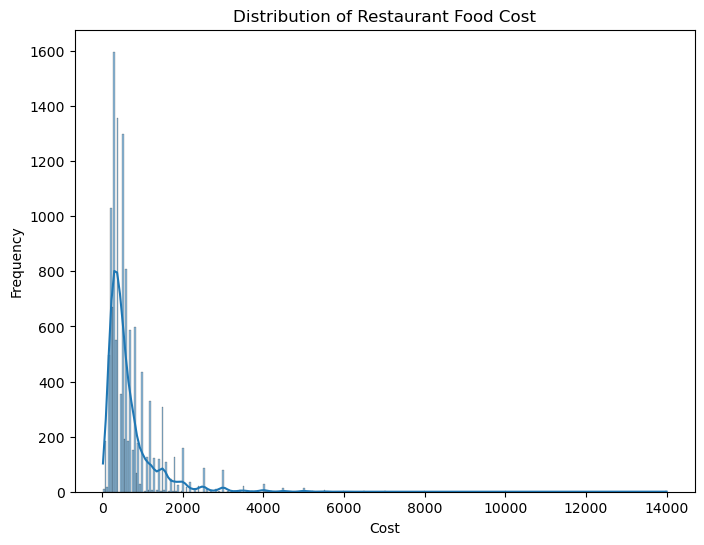

Validation RMSE: 315.4494012249345


C:\Users\LENOVO\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Feature Visualization
# Plotting the distribution of the target variable (COST)
plt.figure(figsize=(8, 6))
sns.histplot(train_df['COST'], kde=True)
plt.title('Distribution of Restaurant Food Cost')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

# Data Transformation
# Convert categorical variables to numerical using one-hot encoding
train_df = pd.get_dummies(train_df, columns=['TITLE', 'CITY', 'LOCALITY'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['TITLE', 'CITY', 'LOCALITY'], drop_first=True)

# Feature Selection
# Select relevant features for training the model
X_train = train_df.drop(columns=['RESTAURANT_ID', 'CUISINES', 'TIME', 'COST', 'RATING', 'VOTES'])
y_train = train_df['COST']
X_test = test_df.drop(columns=['RESTAURANT_ID', 'CUISINES', 'TIME', 'RATING', 'VOTES'])

# Model Training and Evaluation
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the training data into train and validation sets
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_split, y_train_split)

# Predict on the validation set
y_pred_val = model.predict(X_val)

# Evaluate the model
val_rmse = mean_squared_error(y_val, y_pred_val, squared=False)
print("Validation RMSE:", val_rmse)
